***
***
***

<br><h1 style="font-size:300%;">Classification Case Study</h1>
<b>DAT-5303 | Machine Learning</b>
<br>Andrew D'Armond - 5574864<br>
Hult International Business School<br><br><br>

***
***
***

<h2>Objective</h2><br>

Apprentice Chef is looking to extend its revenue stream with its Cross-Sell Platform of *Halfway There*

The objective is to create an algorithm with the highest prediction rate for the platform in
understanding its ability to sell for a wider audience
In order to complete the analysis of the Apprentice Chef data we need to download the following packages. 


<h2>Libraries & Loading File</h2><br>

In [1]:
# importing libraries
import numpy as np              
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

from sklearn.metrics import make_scorer              # customizable scorer





# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<br><h1>Feature Tuning</h1>

Feature engineering is the first step in any machine learning prediciton modeling.
This is because feature engineering represents the foundation of the model. 
Transforming the raw data into features like outlier finding & threshold setting creates
a great opportunity to create a very functional model.


These include, but are not limited to, creating dummy variables for the different e-mail categories, creating a plan to include drinks purchased by the customer, developing a name list of the most used families, etc.
<br>



<h2>Splitting Emails</h2><br>

It's important to split the emails so that we can leverage them in different groups.
This will allow us to trace our customers better and develop better insights.

In [2]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)



In [3]:
#Setting Personal, Professional and Junk Emails
personal_email_domains      = ['@gmail.com',
                               '@yahoo.com',
                               '@protonmail.com']

professional_email_domains  = ['@mmm.com',
                               '@amex.com',
                               '@apple.com',
                               '@boeing.com',
                               '@caterpillar.com',
                               '@chevron.com',
                               '@cisco.com',
                               '@cocacola.com',
                               '@disney.com',
                               '@dupont.com',
                               '@exxon.com',
                               '@ge.org',
                               '@goldmansacs.com',
                               '@homedepot.com',
                               '@ibm.com',
                               '@intel.com',
                               '@jnj.com',
                               '@jpmorgan.com',
                               '@mcdonalds.com',
                               '@merck.com',
                               '@microsoft.com',
                               '@nike.com',
                               '@pfizer.com',
                               '@pg.com',
                               '@travelers.com',
                               '@unitedtech.com',
                               '@unitedhealth.com',
                               '@verizon.com',
                               '@visa.com',
                               '@walmart.com']

junk_email_domains       = ['@me.com',
                            '@aol.com',
                            '@hotmail.com',
                            '@live.com',
                            '@msn.com',
                            '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df[1]:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
           
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)

# checking results
original_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [4]:
original_df['domain_group']

0               junk
1       professional
2           personal
3       professional
4       professional
            ...     
1941        personal
1942        personal
1943        personal
1944        personal
1945            junk
Name: domain_group, Length: 1946, dtype: object

<h2>One Hot Encoding</h2><br> 
One hot encoding is a procedure where you create binary tags for objects in a 
dataframe. Data will be split up and represented by zeros and ones to make the process of computation easier. 

In [5]:
#Creating dummies for Emails
one_hot_Email      = pd.get_dummies(original_df['domain_group'])
#Dropping EMAIL and domain_group from original_df
original_df        = original_df.drop('EMAIL', axis = 1)
original_df        = original_df.drop('domain_group', axis = 1)
#Joining the dummies to original_df
original_df        = original_df.join([one_hot_Email])


<h2>Family Names </h2><br> 

There is a massive amount of data points under a certain list of names. I am going
to make a new column for this list of data points 

In [6]:
#Splitting Family Name to Analyse Effects


THRONES_family_names = ['Arryn',
                        'Baratheon',
                        'Greyjoy',
                        'Lannister',
                        'Martell',
                        'Stark',
                        'Targaryen',
                        'Tully',
                        'Tyrell']



# placeholder list
original_df['THRONES'] = 0


# looping to group observations by domain type
for index, col in original_df.iterrows():
    if col['FAMILY_NAME'] in THRONES_family_names:
        col['THRONES'] = 1 
#    elif col['FAMILY_NAME']  not in THRONES_family_names:
#        col['THRONES'] = 0

#original_df['THRONES'].value_counts()
#original_df[21,'THRONES']




def is_THRONES(x):
    if (x in THRONES_family_names):
        return 1
    else:
        return 0

original_df['THRONES'] = original_df['FAMILY_NAME'].apply(is_THRONES)

original_df['THRONES'].value_counts()

0    1782
1     164
Name: THRONES, dtype: int64

In [7]:
# dropping categorical variables after they've been encoded
original_df = original_df.drop(['FIRST_NAME', 'NAME', 'FAMILY_NAME'], axis = 1)


# checking the results
original_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'junk', 'personal', 'professional', 'THRONES'], dtype='object')

<h2>Outlier & Thresholds</h2><br> 
Previously, we plotted histograms to identify outliers in the data. It is important to visualise the data so we can mark off the areas which should be out of bounds. I did not include these histograms due to processing constraints. 

We will proceed by creating thresholds:

In [8]:
#Setting Outliner Boundaries 

TOTAL_MEALS_ORDERED_HI         = 250
UNIQUE_MEALS_PURC_HI           = 10
AVG_TIME_SPENT_PER_VISIT_HI    = 250
CONTACTS_W_CUSTOMER_SERVICE_LO = 3
CONTACTS_W_CUSTOMER_SERVICE_HI = 12 
CANCELLATIONS_BEFORE_NOON_HI   = 9 
CANCELLATIONS_AFTER_NOON_HI    = 2 
MOBILE_LOGINS_HI               = 6.5
MOBILE_LOGINS_LO               = 4.5
WEEKLY_PLAN_HI                 = 50
EARLY_DELIVERIES_HI            = 7
LATE_DELIVERIES_HI             = 10
AVG_PREP_VID_TIME_HI           = 350
LARGEST_ORDER_SIZE_HI          = 10
MASTER_CLASSES_ATTENDED_HI     = 1
AVG_CLICKS_PER_VISIT_LO        = 7
AVG_CLICKS_PER_VISIT_HI        = 18
MEDIAN_MEAL_RATING_HI          = 4
TOTAL_PHOTOS_VIEWED_HI         = 470

#Dependent Variable Outliner Boundary 
REVENUE_HI                     = 5000

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# Total Meals Ordered
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Unique Meals Purchased
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURC_HI]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# Average Time Per Site Visit
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_SPENT_PER_VISIT_HI]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# Contact With Customer Service 
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Cancellations Before Noon
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] >CANCELLATIONS_BEFORE_NOON_HI]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Cancellations After Noon
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# Mobile Logins
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Weekly Plan
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
# Early Deliveries 
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Late Deliveries
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Average Prep Video Time
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Largest Order Size
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Master Classes Attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# Average Clicks Per Visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Median Meal Rating

original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# Total Photos Viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > AVG_CLICKS_PER_VISIT_HI]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)




In [9]:
#Trend Based Threshold

CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI = 10  #Data Drops off after this point
AVG_TIME_PER_SITE_VISIT_CHANGE_LO     = 100 #Data Drops off before this point
AVG_PREP_VID_TIME_CHANGE_HI           = 250 #Data Scatters after this point
LARGEST_ORDER_SIZE_CHANGE_HI          = 5   #Change in trend after this point
AVG_CLICKS_PER_VISIT_CHANGE_HI        = 10  #Change in trend after this point
MASTER_CLASSES_ATTENDED_CHANGE_LO     = 1   #Change in trend after this point
TOTAL_MEALS_ORDERED_CHANGE_LO         = 24  #Data Drops off before this point

############################################################################

CANCELLATIONS_BEFORE_NOON_CHANGE_AT   = 0   #Zero inflated
CANCELLATIONS_AFTER_NOON_CHANGE_AT    = 0   #Zero inflated
WEEKLY_PLAN_CHANGE_AT                 = 0   #Zero inflated
TOTAL_PHOTOS_VIEWED_CHANGE_AT         = 0   #Zero inflated
UNIQUE_MEALS_PURC_CHANGE_AT           = 1   #Only different at this point
MEDIAN_MEAL_RATING_CHANGE_AT          = 3   #Analysing point 3 seperately
MEDIAN_MEAL_RATING_CHANGE_AT_4        = 4   #Analysing point 4 seperately
MEDIAN_MEAL_RATING_CHANGE_AT_5        = 5   #Analysing point 5 seperately

In [10]:
# Contact With Customer Service 
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# Average Time Spent Per Visit
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0

condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_CHANGE_LO]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
# Average Prep Vid
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI ]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
# Unique Meals Purchased
original_df['change_LARGEST_ORDER_SIZE'] = 0
condition = original_df.loc[0:,'change_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_CHANGE_HI ]

original_df['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Clicks Per Visit
original_df['change_AVG_CLICKS_PER_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_CHANGE_HI ]

original_df['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Master Classes Attended
original_df['change_MASTER_CLASSES_ATTENDED'] = 0
condition = original_df.loc[0:,'change_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_CHANGE_LO ]

original_df['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Total Meals Ordered
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_CHANGE_LO ]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

########################################
##      change at threshold           ##
########################################

# double-equals sign

# Unique Meals Purchased
original_df['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURC_CHANGE_AT]

original_df['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# Cancellations Before Noon
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_CHANGE_AT]

original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Cancellations After Noon
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_CHANGE_AT]

original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Weekly Plan
original_df['change_WEEKLY_PLAN'] = 0
condition = original_df.loc[0:,'change_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] == WEEKLY_PLAN_CHANGE_AT]

original_df['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


# Total Photos Viewed
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_CHANGE_AT]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

# Median Meal Rating
original_df['change_MEDIAN_MEAL_RATING'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT]

original_df['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

original_df['change_MEDIAN_MEAL_RATING_4'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_4'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT_4]

original_df['change_MEDIAN_MEAL_RATING_4'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
original_df['change_MEDIAN_MEAL_RATING_5'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_5'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT_5]

original_df['change_MEDIAN_MEAL_RATING_5'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

#PC_Logins
PC_LOGINS_LO = 1.5
original_df['trend_PC_Logins'] = 0

condition_lo = original_df.loc[0:,'trend_PC_Logins'][original_df['PC_LOGINS'] < PC_LOGINS_LO]

original_df['trend_PC_Logins'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)

<h2>Beverages Purchased</h2><br>

It is hard to determine whether a customer ordered extra beverages from the original columns. 
I am going to create a new variable that allows us to understand if someone in the data orders beverages 
This is important as we are using CROSS_SELL_SUCCESS as the explanatory variable. 

Since all meals can only be priced between 10 dollars and 23 dollars The data points that have a split higher than $23
will now be understood as those who are apart of the CROSS SELL platform and ordered drinks.

In [11]:
# Creating new variables 
# 'beverage'
# Lets me know if buying beverages increaes revenue

original_df['avg_spend'] = original_df['REVENUE']/original_df['TOTAL_MEALS_ORDERED']

avg_spend_change_hi = 23 # ADHOC high meal set price at 23 

original_df['beverage'] = 0
condition = original_df.loc[0:,'beverage'][original_df['avg_spend'] > avg_spend_change_hi]

original_df['beverage'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)


<h2>Trend in Following Recommendations</h2><br>

When running correlations next in my analysis the most correlated variable is 
Followed Recommenation PCT. This is a last minute change following observations with my
scatter & distplots.

In [12]:
original_df['follow_rec_meal']= (original_df['TOTAL_MEALS_ORDERED']*original_df['FOLLOWED_RECOMMENDATIONS_PCT'])/100

#Followed Reccomendations
FOLLOWED_REC_LO = 35
original_df['trend_follow_rec'] = 0

condition_lo = original_df.loc[0:,'trend_follow_rec'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOLLOWED_REC_LO]

original_df['trend_follow_rec'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


<h2>Correlations</h2><br> 
We have to find out which of our variables correlate most with our explanatory value:

*In descending order*

In [13]:
# Checking the Absolutes
np.abs(original_df.corr()["CROSS_SELL_SUCCESS"]).sort_values(ascending=False)

CROSS_SELL_SUCCESS                    1.000000
trend_follow_rec                      0.564994
FOLLOWED_RECOMMENDATIONS_PCT          0.464387
follow_rec_meal                       0.311876
junk                                  0.280870
professional                          0.194102
CANCELLATIONS_BEFORE_NOON             0.163442
change_CANCELLATIONS_BEFORE_NOON      0.138611
MOBILE_NUMBER                         0.102657
TASTES_AND_PREFERENCES                0.081438
REFRIGERATED_LOCKER                   0.068321
out_AVG_CLICKS_PER_VISIT              0.059999
out_CONTACTS_W_CUSTOMER_SERVICE       0.058285
CANCELLATIONS_AFTER_NOON              0.054149
trend_PC_Logins                       0.052852
PC_LOGINS                             0.050647
change_MASTER_CLASSES_ATTENDED        0.049939
change_CANCELLATIONS_AFTER_NOON       0.045200
MOBILE_LOGINS                         0.044462
PACKAGE_LOCKER                        0.043534
personal                              0.038841
MASTER_CLASSE


<h1>Processing</h1><br> 
Having finished engineering our features and having looked at appropriate correlations, we want to prepare the data to be used for different models. This includes:
​
- Copying data to secure from loss
- Format data to make copying into models easier
- Dropping & adding specific columns (variables)
- Scaling the data
​
​


<h2>Creating variable List & splitting</h2><br> 

In [14]:
# declaring set of x-variables
x_variables = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
               'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
               'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
               'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS',
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
               'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME',
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
               'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
               'TOTAL_PHOTOS_VIEWED', 'junk', 'personal', 'professional','THRONES', 'out_TOTAL_MEALS_ORDERED',
               'out_UNIQUE_MEALS_PURCH', 'out_AVG_TIME_PER_SITE_VISIT',
               'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_CANCELLATIONS_BEFORE_NOON',
               'out_CANCELLATIONS_AFTER_NOON', 'out_MOBILE_LOGINS', 'out_WEEKLY_PLAN',
               'out_EARLY_DELIVERIES', 'out_LATE_DELIVERIES',
               'out_AVG_PREP_VID_TIME', 'out_LARGEST_ORDER_SIZE',
               'out_MASTER_CLASSES_ATTENDED', 'out_AVG_CLICKS_PER_VISIT',
               'out_MEDIAN_MEAL_RATING', 'out_TOTAL_PHOTOS_VIEWED',
               'change_CONTACTS_W_CUSTOMER_SERVICE', 'change_AVG_TIME_PER_SITE_VISIT',
               'change_AVG_PREP_VID_TIME', 'change_LARGEST_ORDER_SIZE', 
               'change_AVG_CLICKS_PER_VISIT', 'change_MASTER_CLASSES_ATTENDED',
               'change_TOTAL_MEALS_ORDERED', 'change_UNIQUE_MEALS_PURCH',
               'change_CANCELLATIONS_BEFORE_NOON', 'change_CANCELLATIONS_AFTER_NOON',
               'change_WEEKLY_PLAN', 'change_TOTAL_PHOTOS_VIEWED',
               'change_MEDIAN_MEAL_RATING', 'change_MEDIAN_MEAL_RATING_4',
               'change_MEDIAN_MEAL_RATING_5', 'trend_PC_Logins',
               'avg_spend', 'beverage', 'follow_rec_meal', 'trend_follow_rec']


# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
original_df_data   = original_df.loc[ : , x_variables]


# Preparing the target variable
original_df_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

<h1>Scaling</h1><br> 

It's important to scale the data as this will allow us to have all of our data 
equal to each other so we can not have certain variables have greater impact then others
this will allow us to get the best score possible.

In [15]:
from sklearn.preprocessing import StandardScaler 
# standard scaler
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with original_df_data
scaler.fit(original_df_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(original_df_data)


# converting scaled data into a DataFrame
scaled_df = pd.DataFrame(X_scaled)


# checking the results
scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.0,0.00,0.00,-0.0,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-1.33,-2.37,-2.86,-0.94,-2.37,-3.65,-0.59,-0.5,-0.89,-0.75,-0.3,-0.13,-0.08,-0.10,-0.08,-0.03,-0.04,-0.21,-0.12,-0.21,-0.14,-0.05,-0.02,-0.30,-0.10,-0.08,-0.83,-0.35,-1.15,-0.05,-0.51,-3.05,-0.96,-0.35,-0.31,-0.72,-2.44,-0.56,-1.19,-1.12,-0.39,-0.08,-1.04,-1.38,-1.66,-0.87,-1.22
25%,-0.67,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.96,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.5,-0.89,-0.75,-0.3,-0.13,-0.08,-0.10,-0.08,-0.03,-0.04,-0.21,-0.12,-0.21,-0.14,-0.05,-0.02,-0.30,-0.10,-0.08,-0.83,-0.35,-1.15,-0.05,-0.51,0.33,-0.96,-0.35,-0.31,-0.72,0.41,-0.56,-1.19,-1.12,-0.39,-0.08,-1.04,-0.74,-1.66,-0.65,-1.22
50%,-0.32,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.20,-0.10,-0.28,0.62,0.27,-0.22,-0.59,-0.5,-0.89,-0.75,-0.3,-0.13,-0.08,-0.10,-0.08,-0.03,-0.04,-0.21,-0.12,-0.21,-0.14,-0.05,-0.02,-0.30,-0.10,-0.08,-0.83,-0.35,0.87,-0.05,-0.51,0.33,-0.96,-0.35,-0.31,-0.72,0.41,-0.56,0.84,0.89,-0.39,-0.08,0.96,-0.15,0.60,-0.36,0.82
75%,0.49,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.93,0.47,0.36,0.62,0.27,0.64,0.37,-0.5,1.12,1.34,-0.3,-0.13,-0.08,-0.10,-0.08,-0.03,-0.04,-0.21,-0.12,-0.21,-0.14,-0.05,-0.02,-0.30,-0.10,-0.08,1.21,-0.35,0.87,-0.05,-0.51,0.33,1.04,-0.35,-0.31,1.38,0.41,-0.56,0.84,0.89,-0.39,-0.08,0.96,0.44,0.60,0.29,0.82
max,5.88,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,2.05,8.37,4.23,3.73,2.92,2.35,8.25,2.0,1.12,1.34,3.3,7.61,12.70,9.81,12.70,31.18,25.45,4.68,8.28,4.86,7.39,22.03,44.10,3.39,10.35,12.19,1.21,2.83,0.87,22.03,1.94,0.33,1.04,2.83,3.20,1.38,0.41,1.78,0.84,0.89,2.55,12.19,0.96,6.02,0.60,8.25,0.82


In [16]:
# adding labels to the scaled DataFrame
scaled_df.columns = original_df_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(original_df_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
REVENUE                               1.295040e+06
TOTAL_MEALS_ORDERED                   3.057600e+03
UNIQUE_MEALS_PURCH                    6.257663e+00
CONTACTS_W_CUSTOMER_SERVICE           5.201168e+00
PRODUCT_CATEGORIES_VIEWED             9.261178e+00
AVG_TIME_PER_SITE_VISIT               3.884497e+03
MOBILE_NUMBER                         1.073443e-01
CANCELLATIONS_BEFORE_NOON             2.400263e+00
CANCELLATIONS_AFTER_NOON              1.867359e-01
TASTES_AND_PREFERENCES                2.040816e-01
MOBILE_LOGINS                         3.371049e-01
PC_LOGINS                             2.782182e-01
WEEKLY_PLAN                           1.841399e+02
EARLY_DELIVERIES                      5.373137e+00
LATE_DELIVERIES                       7.528947e+00
PACKAGE_LOCKER                        2.290003e-01
REFRIGERATED_LOCKER                   1.002716e-01
FOLLOWED_RECOMMENDATIONS_PCT          7.060232e+02
AVG_PREP_VID_TIME                  

<h1>Train Test Split</h1><br> 

I am now ready to split my data into its proper segments and begin running different
model types and being receiving scores.

In [17]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            scaled_df,
            original_df_target,
            test_size = 0.25,
            random_state = 222,
            stratify = original_df_target)


# merging training data for statsmodels
scaled_df_train = pd.concat([X_train, y_train], axis = 1)

<h1>Modeling: Logistic Regression</h1><br> 

We will use logistic regression to model because our model decided on a binary variable. 
In our case: CROSS_SELL_SUCCESS.

Any variable with a P-value over .5 will not be considered. 
One after one, I will eliminate variables until I have cut down the model enough. 
My goal is to not have any variables have a P-value > than 0.1.

The second model shows the cut down logistic regression. 

<h2>Full Model</h2><br> 
The first model will be fitted with all of the possible variables. This may seem a little excessive, but from thereon we will begin our journey cutting down on unnecessary variables. These will be determined by their P-value. 

In [18]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~ REVENUE +
                                        TOTAL_MEALS_ORDERED +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        PRODUCT_CATEGORIES_VIEWED +
                                        AVG_TIME_PER_SITE_VISIT +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        PC_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        THRONES +
                                        out_TOTAL_MEALS_ORDERED +
                                        out_UNIQUE_MEALS_PURCH +
                                        out_AVG_TIME_PER_SITE_VISIT +
                                        out_CONTACTS_W_CUSTOMER_SERVICE +
                                        out_CANCELLATIONS_BEFORE_NOON +
                                        out_CANCELLATIONS_AFTER_NOON +
                                        out_MOBILE_LOGINS +
                                        out_WEEKLY_PLAN +
                                        out_EARLY_DELIVERIES +
                                        out_LATE_DELIVERIES +
                                        out_AVG_PREP_VID_TIME +
                                        out_LARGEST_ORDER_SIZE +
                                        out_MASTER_CLASSES_ATTENDED +
                                        out_AVG_CLICKS_PER_VISIT +
                                        out_MEDIAN_MEAL_RATING +
                                        out_TOTAL_PHOTOS_VIEWED +
                                        change_CONTACTS_W_CUSTOMER_SERVICE +
                                        change_AVG_TIME_PER_SITE_VISIT +
                                        change_AVG_PREP_VID_TIME +
                                        change_LARGEST_ORDER_SIZE +
                                        change_AVG_CLICKS_PER_VISIT +
                                        change_MASTER_CLASSES_ATTENDED +
                                        change_TOTAL_MEALS_ORDERED +
                                        change_UNIQUE_MEALS_PURCH +
                                        change_CANCELLATIONS_BEFORE_NOON +
                                        change_CANCELLATIONS_AFTER_NOON +
                                        change_WEEKLY_PLAN +
                                        change_TOTAL_PHOTOS_VIEWED +
                                        change_MEDIAN_MEAL_RATING +
                                        change_MEDIAN_MEAL_RATING_4 +
                                        change_MEDIAN_MEAL_RATING_5 +
                                        trend_PC_Logins +
                                        avg_spend +
                                        beverage +
                                        follow_rec_meal +
                                        trend_follow_rec""",
                                        data = scaled_df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.366349
         Iterations: 35


/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/andrewdarmond/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1400
Method:                           MLE   Df Model:                           58
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.4166
Time:                        20:17:56   Log-Likelihood:                -534.50
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.176e-123
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             17.8201   4.99e+04      0.000      1.000   -9.77e+04    9.77e+04
REVENUE                               -0.4453      0.218     -2.043      0.041      -0.873      -0.018
TOTAL_MEALS_ORDERED                    0.1702      0.255      0.666      0.505      -0.330       0.671
UNIQUE_MEALS_PURCH                     0.0475      0.090      0.527      0.598      -0.129       0.224
CONTACTS_W_CUSTOMER_SERVICE            0.0532      0.135      0.394      0.694      -0.212       0.318
PRODUCT_CATEGORIES_VIEWED             -0.0046      0.077     -0.060      0.952      -0.155       0.145
AVG_TIME_PER_SITE_VISIT                0.0801      0.138      0.581      0.561      -0.190       0.350
MOBILE_NUMBER                          0.2721      0.075      3.608      0.000       0.124       0.420
CANCELLATIONS_BEFORE_NOON              0.3280      0.111      2.945      0.003       0.110       0.546
CANCELLATIONS_AFTER_NOON              -0.4344      0.253     -1.719      0.086      -0.930       0.061
TASTES_AND_PREFERENCES                 0.1739      0.075      2.320      0.020       0.027       0.321
MOBILE_LOGINS                          0.0420      0.073      0.571      0.568      -0.102       0.186
PC_LOGINS                              0.0946      0.283      0.335      0.738      -0.459       0.649
WEEKLY_PLAN                           -0.0010      0.090     -0.011      0.991      -0.178       0.176
EARLY_DELIVERIES                      -0.0431      0.098     -0.440      0.660      -0.235       0.149
LATE_DELIVERIES                        0.0768      0.087      0.884      0.376      -0.093       0.247
PACKAGE_LOCKER                        -0.0152      0.086     -0.176      0.860      -0.184       0.153
REFRIGERATED_LOCKER                    0.0173      0.090      0.193      0.847      -0.158       0.193
FOLLOWED_RECOMMENDATIONS_PCT          -1.0673      0.363     -2.943      0.003      -1.778      -0.356
AVG_PREP_VID_TIME                      0.1704      0.190      0.897      0.370      -0.202       0.543
LARGEST_ORDER_SIZE                     0.0608      0.161      0.377      0.706      -0.255       0.377
MASTER_CLASSES_ATTENDED               -0.8881      0.781     -1.138      0.255      -2.418       0.642
MEDIAN_MEAL_RATING                    -0.2660      0.312     -0.852      0.394      -0.878       0.346
AVG_CLICKS_PER_VISIT                  -0.2902      0.164     -1.773      0.076      -0.611       0.031
TOTAL_PHOTOS_VIEWED                   -0.0225      0.124     -0.181      0.856      -0.266       0.221
THRONES                                0.0377      0.079      0.474      0.635      -0.118       0.193
out_TOTAL_MEALS_ORDERED               -0.1446      0.113     -1.285      0.199      -0.365       0.076
out_UNIQUE_MEALS_PURCH                 0.0035      0.100      0.036      0.972      -0.192       0.199
out_AVG_TIME_PER_SITE_VISIT           -0.0163   

<h2>Significant Model</h2><br> 
The second model shows the logistic regression freed from high P-value variables. It only includes variables with a P-value below 0.1.

In [19]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ REVENUE +
                                    MOBILE_NUMBER +
                                    CANCELLATIONS_BEFORE_NOON +
                                    TASTES_AND_PREFERENCES +
                                    PC_LOGINS +
                                    FOLLOWED_RECOMMENDATIONS_PCT +
                                    AVG_CLICKS_PER_VISIT +
                                    out_TOTAL_MEALS_ORDERED +
                                    out_MASTER_CLASSES_ATTENDED +
                                    change_AVG_TIME_PER_SITE_VISIT +
                                    change_LARGEST_ORDER_SIZE +
                                    change_AVG_CLICKS_PER_VISIT +
                                    personal +
                                    professional""",
                                    data = scaled_df_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.436220
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                           14
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.3053
Time:                        20:17:56   Log-Likelihood:                -636.45
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.185e-110
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.2777      0.089     14.323      0.000       1.103       1.453
REVENUE                           -0.0227      0.096     -0.238      0.812      -0.210       0.165
MOBILE_NUMBER                      0.2527      0.067      3.771      0.000       0.121       0.384
CANCELLATIONS_BEFORE_NOON          0.3802      0.078      4.904      0.000       0.228       0.532
TASTES_AND_PREFERENCES             0.1538      0.068      2.245      0.025       0.020       0.288
PC_LOGINS                         -0.1641      0.069     -2.374      0.018      -0.300      -0.029
FOLLOWED_RECOMMENDATIONS_PCT       1.5500      0.107     14.530      0.000       1.341       1.759
AVG_CLICKS_PER_VISIT              -0.1595      0.095     -1.687      0.092      -0.345       0.026
out_TOTAL_MEALS_ORDERED           -0.0423      0.070     -0.607      0.544      -0.179       0.094
out_MASTER_CLASSES_ATTENDED        0.0863      0.072      1.194      0.232      -0.055       0.228
change_AVG_TIME_PER_SITE_VISIT    -0.1466      0.074     -1.970      0.049      -0.292      -0.001
change_LARGEST_ORDER_SIZE         -0.0202      0.077     -0.264      0.792      -0.170       0.130
change_AVG_CLICKS_PER_VISIT        0.0639      0.088      0.724      0.469      -0.109       0.237
personal                           0.6160      0.089      6.953      0.000       0.442       0.790
professional                       0.9191      0.094      9.785      0.000       0.735       1.103
==================================================================================================
"""

<h2>Dictionary</h2><br> 

This is so we can have access to our variables quicker and makes it easier for
us to model later if need be.

In [20]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED',
                   'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                   'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 
                   'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 
                   'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 
                   'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 
                   'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
                   'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
                   'AVG_CLICKS_PER_VISIT ', 'TOTAL_PHOTOS_VIEWED', 
                   'out_TOTAL_MEALS_ORDERED', 'out_UNIQUE_MEALS_PURCH', 
                   'out_AVG_TIME_PER_SITE_VISIT', 'out_CONTACTS_W_CUSTOMER_SERVICE',
                   'out_CANCELLATIONS_BEFORE_NOON', 'out_CANCELLATIONS_AFTER_NOON', 
                   'out_MOBILE_LOGINS', 'out_WEEKLY_PLAN', 'out_EARLY_DELIVERIES ',
                   'out_LATE_DELIVERIES', 'out_AVG_PREP_VID_TIME', 
                   'out_LARGEST_ORDER_SIZE', 'out_MASTER_CLASSES_ATTENDED', 
                   'out_AVG_CLICKS_PER_VISIT', 'out_MEDIAN_MEAL_RATING',
                   'out_TOTAL_PHOTOS_VIEWED', 'change_CONTACTS_W_CUSTOMER_SERVICE', 
                   'change_AVG_TIME_PER_SITE_VISIT', 'change_AVG_PREP_VID_TIME', 
                   'change_LARGEST_ORDER_SIZE', 'change_AVG_CLICKS_PER_VISIT', 
                   'change_MASTER_CLASSES_ATTENDED', 'change_TOTAL_MEALS_ORDERED',
                   'change_UNIQUE_MEALS_PURCH', 'change_CANCELLATIONS_BEFORE_NOON',
                   'change_CANCELLATIONS_AFTER_NOON', 'change_WEEKLY_PLAN', 
                   'change_TOTAL_PHOTOS_VIEWED', 'change_MEDIAN_MEAL_RATING',
                   'change_MEDIAN_MEAL_RATING_4', 'change_MEDIAN_MEAL_RATING_5'
                   'beverage'],
 
 # significant variables only
 'logit_sig'    : ['REVENUE','MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON',  
                   'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
                   'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_CLICKS_PER_VISIT', 
                   'out_TOTAL_MEALS_ORDERED', 'out_MASTER_CLASSES_ATTENDED', 
                   'change_LARGEST_ORDER_SIZE', 'change_AVG_CLICKS_PER_VISIT', 
                   'personal', 'professional']

}

<h1>Scoring:</h1><br> 


In [21]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))


Training ACCURACY: 0.8218
Testing  ACCURACY: 0.7906


In [22]:
# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.7645828491749942

In [23]:
# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(C=2.4000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=802, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned.fit(scaled_df, original_df_target)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


Training ACCURACY: 0.8184
Testing  ACCURACY: 0.8234
AUC Score        : 0.8023


<h1>Plots</h1><br> 

I'm going to plot a couple of things to show the significance of certain features.
Along with this, I want to display a tree that shows the splits in significance.
The tree score that i run for the plots is relatively similar in AUC score to the Log Reg.

<h2>Tree Plot</h2><br> 

In [24]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export =False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

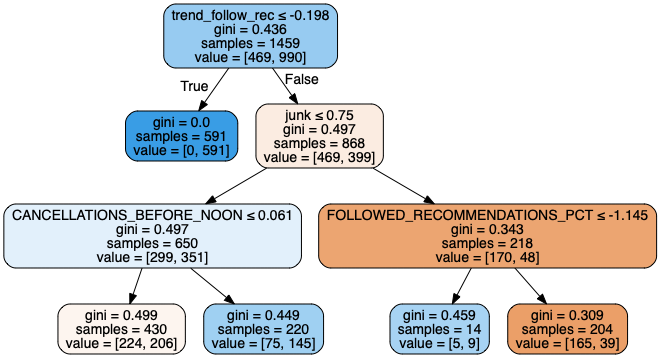

In [25]:
tree_pruned = DecisionTreeClassifier(max_depth = 3,
                                     min_samples_leaf = 1,
                                    random_state = 222)

tree_pruned_fit = tree_pruned.fit(X_train, y_train)

tree_pred = tree_pruned_fit.predict(X_test)

display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

<h2>Feature Importance Plot</h2><br> 

In [26]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

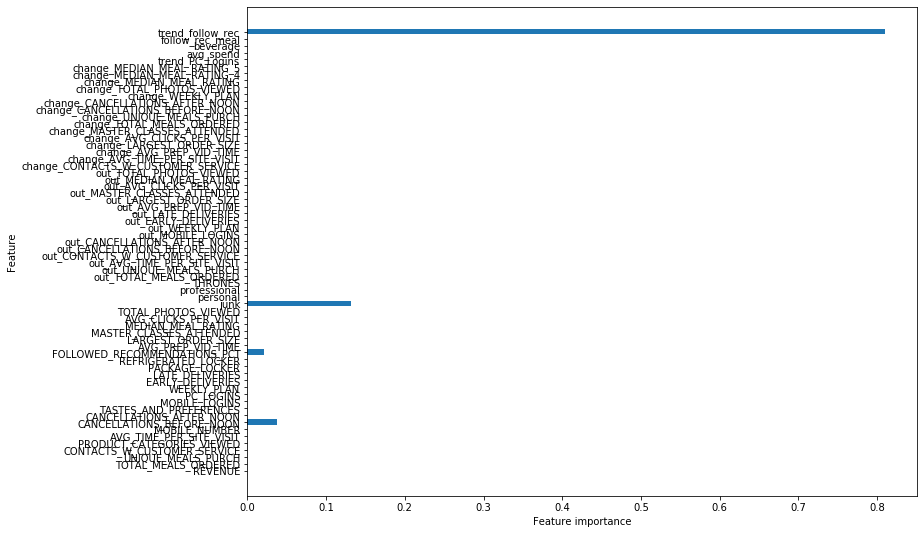

In [27]:
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

<h1>Other Models</h1><br> 

I ran a variety of other models including: KNN Neighbors, GBM boosting, Random Forests, &
XGBoost. All others had lower scores so I removed them from this analysis.